Chúc các bạn làm bài tốt!

# Load thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod

# 1: Implement lại thuật toán Linear Regression

In [ ]:
class MyLinearRegression():
    def __init__(self):
        pass

    def fit(self, X, y):
        """
        This function is used to estimate parameters using the normal equation approach.
            Parameters:
                    X: an ndarray - Features in shape of (N,d)
                    y: an ndarray - Output in shape of (N,1)
                where N is number of observations, d is number of features
            Returns:
                    theta: an ndarray - the first element is intercept, the others are slopes
        """

        N = X.shape[0]
        ones = np.ones((N, 1))
        X_bar = np.concatenate((ones, X), axis=1)
        A = np.linalg.inv(np.dot(X_bar.T, X_bar))
        B = np.dot(X_bar.T, y)
        self.theta = np.dot(A, B)
        print(f'The intercept is: ', self.theta[0])
        print(f'The slope is: ', self.theta[1:])
        return self.theta

    def predict(self, X_test):
        """
        This function is used to predict new observations using the model in 'fit' function.
            Parameters:
                    X_test: an ndarray - Features in shape of (N,d)
                where N is number of new observations, d is number of features
            Returns:
                    y_pred : an ndarrray - the prediction of X_test
        """
            
        ones = np.ones((X_test.shape[0], 1))
        X_test_bar = np.concatenate((ones, X_test), axis=1)
        y_pred = np.dot(X_test_bar, self.theta)
        return y_pred

# 2a: Fit dữ liệu trong file linear.csv và visualize

In [ ]:
df=pd.read_csv('linear.csv')
X = df.iloc[:, 0].to_numpy()
X = X.reshape(X.shape[0], 1)
y = df.iloc[:, 1].to_numpy()
y = y.reshape(y.shape[0], 1)

In [ ]:
LR = MyLinearRegression()
LR.fit(X, y)


# In-sample Forecasting

X_test_in_sample = X
y_pred_in_sample = LR.predict(X_test_in_sample)



The intercept is:  [-7.06426865]
The slope is:  [[15.2110908]]


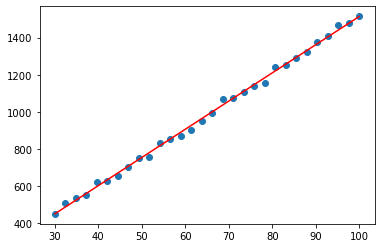

In [ ]:
# Plotting

## Plot original data 
plt.scatter(X,y)

## Plot prediction 
plt.plot(X_test_in_sample, y_pred_in_sample, 'red')

plt.show()

**So sánh với kết quả của thư viện Scikit learn**


In [ ]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X, y)
print('The intercept by Sklearn:', lr.intercept_)
print('The slopes by Sklearn:', lr.coef_)


The intercept by Sklearn: [-7.06426865]
The slopes by Sklearn: [[15.2110908]]


# 2b: Tính loss Root Mean Squared Error - RMSE

In [ ]:
# Preparing data:

X_test_in_sample = X
y_test_in_sample = y

X_test_out_sample = np.array([[3], [5]])
y_test_out_sample = np.array([[10], [20]])

y_pred_in_sample = LR.predict(X_test_in_sample)
y_pred_out_sample = LR.predict(X_test_out_sample)

In [ ]:
def RMSE(y_test, y_pred):
    diff = y_test - y_pred
    return np.sqrt(np.mean(diff**2))

In [ ]:
# In-sample RMSE:
print(f'In-sample RMSE: ', RMSE(y_test_in_sample, y_pred_in_sample))


# Out-sample RMSE:

print(f'Out-sample RMSE: ', RMSE(y_test_out_sample, y_pred_out_sample))

In-sample RMSE:  15.704135712961877
Out-sample RMSE:  40.10189657476019


**So sánh với kết quả của thư viện Scikit learn**


In [ ]:
from sklearn.metrics import mean_squared_error

in_sample_rmse = np.sqrt(mean_squared_error(y_pred_in_sample, y_test_in_sample))

out_sample_rmse = np.sqrt(mean_squared_error(y_pred_out_sample, y_test_out_sample))


print(f'In-sample RMSE by SKlearn: ', in_sample_rmse)
print(f'Out-sample RMSE by SKlearn: ', out_sample_rmse)

In-sample RMSE by SKlearn:  15.704135712961877
Out-sample RMSE by SKlearn:  40.10189657476019


# 3a: Fit dữ liệu trong file nonLinear.csv 

In [ ]:
df_non_linear = pd.read_csv('nonLinear.csv')
X = df_non_linear.iloc[:, 0].to_numpy()
X = X.reshape(X.shape[0], 1)
y = df_non_linear.iloc[:, 1].to_numpy()
y = y.reshape(y.shape[0], 1)

NonLinear = MyLinearRegression()
NonLinear.fit(X, y)
y_test_1 = NonLinear.predict(X)
print('RMSE of model 1:', RMSE(y_test_1, y))

The intercept is:  [-1788.5078219]
The slope is:  [[30.00003629]]
RMSE of model 1: 389.76075726798217


# 3b: Visualize kết quả

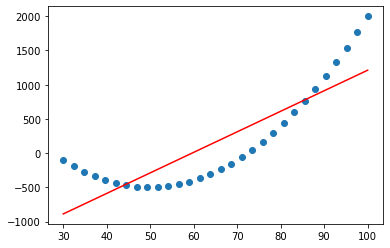

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_test_1, 'red')

# 3c: Nhận xét

Mô hình không tốt và không có độ chính xác cao. Bằng hình ảnh, ta có thể thấy kết quả ước lượng được bằng Simple Linear Regression  <span style="color:red">(đường màu đỏ)</span>  khác xa so với dữ liệu gốc <span style="color:blue">(đường màu xanh)</span>.
Do vậy, chúng ta cần tăng độ phức tạp ( Model Complexity) bằng các cách sau:
* Tăng features được sử dụng (không khả thi)
* Thay đổi dạng hàm của mô hình phù hợp hơn (cụ thể là hàm bậc 2)
* Sử dụng mô hình khác hiệu quả hơn

# 4: Cải thiện model

In [ ]:
# Prepare the data:

square_of_area = df_non_linear.iloc[:, 0]**2
df_non_linear.insert(0, 'Bình phương diện tích', square_of_area, True)
df_non_linear.head()

Bình phương diện tích  Diện tích  Giá nhà
0             900.000000    30.0000 -100.000
1            1050.654430    32.4138 -190.725
2            1212.961722    34.8276 -269.798
3            1386.921874    37.2414 -337.218
4            1572.534887    39.6552 -392.985

In [ ]:
X = df_non_linear.iloc[:, 0:2].to_numpy()

y = df_non_linear.iloc[:, -1].to_numpy()


In [ ]:
non_linear_regression = MyLinearRegression()
non_linear_regression.fit(X,y)
y_pred = non_linear_regression.predict(X)

The intercept is:  2000.0057942501226
The slope is:  [   1.00000199 -100.00022214]


In [ ]:
y_pred

array([ -99.99908082, -190.7248871 , -269.79780933, -337.21784751,
       -392.98500165, -437.09927175, -469.56065781, -490.36915981,
       -499.52463985, -497.02785653, -482.87818916, -457.07563775,
       -419.6202023 , -370.5118828 , -309.75067926, -237.33659168,
       -153.26962004,  -57.54976437,   49.82297535,  168.84859911,
        299.52710692,  441.85849878,  595.83615397,  761.47283116,
        938.76239238, 1127.70483765, 1328.30016697, 1540.54838033,
       1764.44947773, 2000.00345918])

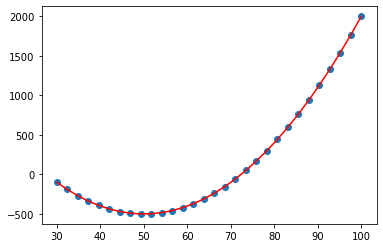

In [ ]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, 'red')
plt.show()

In [ ]:
print(f'RMSE of polynomial model:' , RMSE(y, y_pred))

RMSE of polynomial model: 0.0016144652377167719


# 5: Thử nghiệm với dữ liệu sample.csv

In [ ]:
sample_df = pd.read_csv('sample.csv')
sample_df = sample_df[[ 'Femoral Neck', 'Activity', '%Fat S', 'pound', 'Kg']]
sample_df

Femoral Neck  Activity     %Fat S       pound         Kg
0          0.934   3508.44  -3.265217  115.918058  52.163126
1          0.888   2773.54   0.734783  137.337699  61.801964
2          0.933   1738.97   9.134783  207.644521  93.440034
3          0.757   1665.29   4.234783  133.053771  59.874197
4          1.031   3982.95  -3.965217  111.886125  50.348756
..           ...       ...        ...         ...        ...
87         0.633   1283.66  -5.365217   96.766379  43.544870
88         0.621   2829.43 -10.465217  100.798311  45.359240
89         0.744   2922.46   2.834783   97.774362  43.998463
90         0.622   2560.61  -5.665217   75.598733  34.019430
91         0.735   2366.34  -2.965217  105.838227  47.627202

[92 rows x 5 columns]

Với $n$ features, ta sẽ có  $ 2^n - 1$ cách kết hợp các biến để tạo ra model. (với điều kiện model phải chứa ít nhất 1 predictors).

Do đó, với n = 4, ta sẽ có 15 models

In [ ]:
Sample_Linear_Regression = MyLinearRegression()
# Model 1: combine all features
X_test_1 = sample_df.iloc[:, : -1].to_numpy()

y_test  = sample_df.iloc[:, -1].to_numpy()
y_test = y_test.reshape(y_test.shape[0],1)

model_1 = Sample_Linear_Regression.fit(X_test_1, y_test)

y_pred_1 = Sample_Linear_Regression.predict(X_test_1)
RMSE_model_1  =  RMSE(y_test, y_pred_1)
print('RMSE of model 1 is: ', RMSE_model_1)

The intercept is:  [4.26325641e-13]
The slope is:  [[ 3.41060513e-13]
 [-8.32667268e-17]
 [-4.35207426e-14]
 [ 4.50000000e-01]]
RMSE of model 1 is:  1.4536074086599e-12


In [ ]:
X_test_2 = sample_df.iloc[: , [0,1,2]]
model_2 = Sample_Linear_Regression.fit(X_test_2, y_test)
y_pred_2 = Sample_Linear_Regression.predict(X_test_2)

print('RMSE of model 2 is: ', RMSE(y_test, y_pred_2))

The intercept is:  [14.63278783]
The slope is:  [[ 5.61268722e+01]
 [-2.25652165e-03]
 [ 1.39727147e+00]]
RMSE of model 2 is:  6.617340352324685


In [ ]:
X_test_3 = sample_df.iloc[: , [0,1,3]]
model_3 = Sample_Linear_Regression.fit(X_test_3, y_test)
y_pred_3 = Sample_Linear_Regression.predict(X_test_3)

print('RMSE of model 3 is: ', RMSE(y_test, y_pred_3))

The intercept is:  [-1.13686838e-13]
The slope is:  [[ 0.00000000e+00]
 [-5.55111512e-17]
 [ 4.50000000e-01]]
RMSE of model 2 is:  1.472555892410036e-13


In [ ]:
X_test_4 = sample_df.iloc[: , [0,2,3]]
model_4 = Sample_Linear_Regression.fit(X_test_4, y_test)
y_pred_4 = Sample_Linear_Regression.predict(X_test_4)

print('RMSE of model 4 is: ', RMSE(y_test, y_pred_4))

The intercept is:  [-4.66116035e-12]
The slope is:  [[ 3.63797881e-12]
 [-8.52651283e-14]
 [ 4.50000000e-01]]
RMSE of model 2 is:  5.383361589680339e-13


In [ ]:
X_test_5 = sample_df.iloc[: , [1,2,3]]
model_5 = Sample_Linear_Regression.fit(X_test_5, y_test)
y_pred_5 = Sample_Linear_Regression.predict(X_test_5)

print('RMSE of model 5 is: ', RMSE(y_test, y_pred_5))

The intercept is:  [-2.27373675e-12]
The slope is:  [[ 1.38777878e-17]
 [-7.10542736e-14]
 [ 4.50000000e-01]]
RMSE of model 2 is:  3.737477401945188e-13


In [ ]:
X_test_6 = sample_df.iloc[: , [0,1]]
model_6 = Sample_Linear_Regression.fit(X_test_6, y_test)
y_pred_6 = Sample_Linear_Regression.predict(X_test_6)

print('RMSE of model 6 is: ', RMSE(y_test, y_pred_6))

The intercept is:  [-18.48543501]
The slope is:  [[ 1.00317545e+02]
 [-3.18243146e-03]]
RMSE of model 2 is:  10.846522394748586


In [ ]:
X_test_7 = sample_df.iloc[: , [0,2]]
model_7 = Sample_Linear_Regression.fit(X_test_7, y_test)
y_pred_7 = Sample_Linear_Regression.predict(X_test_7)

print('RMSE of model 7 is: ', RMSE(y_test, y_pred_7))

The intercept is:  [12.78814201]
The slope is:  [[51.22531171]
 [ 1.43815059]]
RMSE of model 2 is:  7.003947612510636


In [ ]:
X_test_8 = sample_df.iloc[: , [0,3]]
model_8 = Sample_Linear_Regression.fit(X_test_8, y_test)
y_pred_8 = Sample_Linear_Regression.predict(X_test_8)

print('RMSE of model 8 is: ', RMSE(y_test, y_pred_8))

The intercept is:  [-2.27373675e-12]
The slope is:  [[3.63797881e-12]
 [4.50000000e-01]]
RMSE of model 2 is:  4.79284988820998e-13


In [ ]:
X_test_9 = sample_df.iloc[: , [1,2]]
model_9 = Sample_Linear_Regression.fit(X_test_9, y_test)
y_pred_9 = Sample_Linear_Regression.predict(X_test_9)

print('RMSE of model 9 is: ', RMSE(y_test, y_pred_9))

The intercept is:  [57.23438959]
The slope is:  [[-1.29048047e-03]
 [ 1.78179655e+00]]
RMSE of model 2 is:  8.342943611586078


In [ ]:
X_test_10 = sample_df.iloc[: , [1,3]]
model_10 = Sample_Linear_Regression.fit(X_test_10, y_test)
y_pred_10 = Sample_Linear_Regression.predict(X_test_10)

print('RMSE of model 10 is: ', RMSE(y_test, y_pred_10))

The intercept is:  [-9.09494702e-13]
The slope is:  [[5.55111512e-17]
 [4.50000000e-01]]
RMSE of model 2 is:  2.9906994657700084e-13


In [ ]:
X_test_11 = sample_df.iloc[: , [2,3]]
model_11 = Sample_Linear_Regression.fit(X_test_11, y_test)
y_pred_11 = Sample_Linear_Regression.predict(X_test_11)

print('RMSE of model 11 is: ', RMSE(y_test, y_pred_11))

The intercept is:  [-1.26476607e-12]
The slope is:  [[-3.73034936e-14]
 [ 4.50000000e-01]]
RMSE of model 11 is:  2.411320667933359e-13
